# 01 - Gathering data

In [ ]:
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

In [2]:
# Define the base URL and the season numbers
base_url = "https://www.football-data.co.uk/mmz4281/{}/E0.csv"
seasons = ["0506","0607","0708","0809","0910","1011","1112","1213","1314",
           "1415","1516","1617","1718","1819", "1920","2021","2122", "2223", 
           "2324", "2425"]

# Define the base path for saving the data
data_path = os.path.join("..", "data", "raw_data")

# Loop through the seasons and scrape the csv files
for season in seasons:
    url = base_url.format(season)
    response = requests.get(url)
    # Use os.path.join to create the file path
    file_path = os.path.join(data_path, f"premier_league_{season}.csv")
    with open(file_path, "wb") as f:
        f.write(response.content)

In [3]:
# checking the data
path = os.path.join("..","data","raw_data","premier_league_2122.csv")

df = pd.read_csv(path)

df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,8,22,3,4,12,8,2,5,0,0,0,0,4.00,3.40,1.95,4.00,3.50,1.95,3.80,3.40,2.05,4.05,3.46,2.05,4.00,3.40,1.90,4.10,3.40,2.00,4.62,3.72,2.10,4.02,3.43,2.02,2.10,1.72,2.22,1.73,2.26,1.83,2.16,1.73,0.50,1.86,2.07,1.88,2.06,2.05,2.08,1.87,2.03,3.80,3.25,2.05,3.80,3.3,2.05,3.80,3.25,2.10,3.94,3.33,2.13,3.90,3.00,2.05,3.90,3.25,2.10,4.20,3.50,2.18,3.89,3.28,2.10,2.37,1.57,2.44,1.62,2.47,1.75,2.33,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,H,P Tierney,16,10,8,3,11,9,5,4,1,2,0,0,1.53,4.50,5.75,1.53,4.50,5.75,1.55,4.40,5.75,1.56,4.57,5.96,1.52,4.33,5.80,1.55,4.40,6.00,1.59,4.65,6.35,1.55,4.48,5.87,1.61,2.30,1.67,2.32,1.71,2.38,1.65,2.29,-1.00,1.95,1.98,1.96,1.96,2.00,2.01,1.93,1.96,1.61,4.20,5.25,1.62,4.1,5.25,1.65,4.20,4.90,1.67,4.20,5.40,1.57,4.20,5.50,1.65,4.10,5.25,1.71,4.33,5.80,1.64,4.19,5.22,1.66,2.20,1.70,2.27,1.75,2.37,1.67,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,H,D Coote,14,14,3,8,10,7,7,6,2,1,0,0,3.10,3.10,2.45,3.20,3.10,2.40,3.15,3.05,2.45,3.30,3.12,2.51,3.20,3.00,2.45,3.13,3.10,2.45,3.33,3.20,2.60,3.19,3.09,2.49,2.50,1.53,2.56,1.56,2.56,1.63,2.46,1.57,0.25,1.80,2.14,1.83,2.12,1.83,2.17,1.79,2.12,3.10,3.10,2.45,3.25,3.1,2.40,3.10,3.05,2.45,3.27,3.14,2.51,3.10,3.00,2.45,3.13,3.13,2.50,3.35,3.20,2.56,3.19,3.10,2.48,2.30,1.61,2.33,1.67,2.42,1.71,2.34,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,13,4,6,1,15,11,5,2,0,0,0,0,1.25,5.75,13.00,1.28,5.75,10.50,1.25,6.00,13.00,1.26,6.24,12.74,1.25,5.50,13.00,1.25,5.75,13.00,1.30,6.30,15.00,1.26,5.92,12.80,1.80,2.00,1.80,2.09,1.84,2.12,1.79,2.06,-1.50,1.84,2.09,1.79,2.12,1.93,2.12,1.83,2.07,1.30,5.25,11.00,1.33,5.0,10.00,1.30,5.25,11.00,1.34,5.40,11.00,1.30,5.25,10.00,1.33,5.00,11.00,1.36,5.50,11.50,1.33,5.17,10.58,1.90,1.90,1.93,1.98,1.96,2.07,1.90,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,A,A Madley,14,6,6,3,13,15,6,8,2,0,0,0,1.90,3.50,4.00,1.95,3.50,3.90,1.95,3.45,3.95,2.01,3.56,4.10,1.95,3.40,4.00,1.95,3.40,4.10,2.04,3.66,4.25,1.97,3.53,4.04,2.00,1.80,2.14,1.78,2.14,1.85,2.07,1.79,-0.50,2.00,1.93,2.01,1.92,2.01,1.97,1.96,1.92,2.00,3.40,3.90,2.05,3.4,3.75,2.00,3.35,4.00,2.05,3.45,4.07,1.95,3.40,3.90,2.00,3.30,4.20,2.12,3.50,4.20,2.04,3.39,3.95,2.20,1.66,2.28,1.69,2.34,1.77,2.24,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86


### Notes for Football Data

All data is in csv format, ready for use within standard spreadsheet applications.

#### Key to results data:

- Div = League Division
- Date = Match Date (dd/mm/yy)
- Time = Time of match kick off
- HomeTeam = Home Team
- AwayTeam = Away Team
- FTHG and HG = Full Time Home Team Goals
- FTAG and AG = Full Time Away Team Goals
- FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
- HTHG = Half Time Home Team Goals
- HTAG = Half Time Away Team Goals
- HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

#### Match Statistics (where available)

- Attendance = Crowd Attendance
- Referee = Match Referee
- HS = Home Team Shots
- AS = Away Team Shots
- HST = Home Team Shots on Target
- AST = Away Team Shots on Target
- HHW = Home Team Hit Woodwork
- AHW = Away Team Hit Woodwork
- HC = Home Team Corners
- AC = Away Team Corners
- HF = Home Team Fouls Committed
- AF = Away Team Fouls Committed
- HFKC = Home Team Free Kicks Conceded
- AFKC = Away Team Free Kicks Conceded
- HO = Home Team Offsides
- AO = Away Team Offsides
- HY = Home Team Yellow Cards
- AY = Away Team Yellow Cards
- HR = Home Team Red Cards
- AR = Away Team Red Cards

Key to 1X2 (match) betting odds data: 

- B365H = Bet365 home win odds
- B365D = Bet365 draw odds
- B365A = Bet365 away win odds

In [4]:
# check column names
df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

In [5]:
columns_to_select = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
                     'HTHG','HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST','AST', 
                     'HF', 'AF', 'HC','AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A']

len(columns_to_select)

25

In [6]:
# Define the directory where the CSV files are located
directory = os.path.join("..", "data", "raw_data")

# Get the list of CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith(".csv")]

# Iterate through each CSV file
for file in csv_files:
    file_path = os.path.join(directory, file)
    
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
        
        # Check if all columns in columns_to_select exist in the dataframe
        if all(column in df.columns for column in columns_to_select):
            print(f"{file} contains all columns")
        else:
            print(f"{file} is missing some columns")
    
    except pd.errors.ParserError as e:
        print(f"Error parsing {file}: {str(e)}")

premier_league_2425.csv contains all columns
premier_league_1819.csv contains all columns
premier_league_2021.csv contains all columns
premier_league_0910.csv contains all columns
premier_league_2122.csv contains all columns
premier_league_1415.csv contains all columns
premier_league_1314.csv contains all columns
premier_league_1920.csv contains all columns
premier_league_0708.csv contains all columns
premier_league_0809.csv contains all columns
premier_league_2223.csv contains all columns
premier_league_1213.csv contains all columns
premier_league_0506.csv contains all columns
premier_league_0607.csv contains all columns
premier_league_1617.csv contains all columns
premier_league_1516.csv contains all columns
premier_league_1112.csv contains all columns
premier_league_1011.csv contains all columns
premier_league_1718.csv contains all columns
premier_league_2324.csv contains all columns


In [7]:
# Define the base path and the season format for CSV files
base_path = os.path.join("..", "data","raw_data")
file_name_template = "premier_league_{}.csv"
year = []

# Create an empty list to store the dataframes
dfs = []

# Loop through the seasons and read the csv files
for season in seasons:
    # Use os.path.join to create the file path
    file_path = os.path.join(base_path, file_name_template.format(season))
    
    try:
        df = pd.read_csv(file_path, usecols=columns_to_select, encoding='utf-8')
        df["Season"] = "20" + season[:2]
        dfs.append(df)
    
    except pd.errors.ParserError as e:
        print(f"Error parsing {file_path}: {str(e)}")

# Concatenate the dataframes on index
result = pd.concat(dfs, ignore_index=True)

In [8]:
result.shape

(7331, 26)

In [9]:
result

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Season
0,13/08/05,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,M Riley,3.0,13.0,2.0,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,2.30,3.25,3.00,2005
1,13/08/05,Everton,Man United,0.0,2.0,A,0.0,1.0,A,G Poll,10.0,12.0,5.0,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,5.00,3.40,1.72,2005
2,13/08/05,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,R Styles,15.0,7.0,7.0,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,2.37,3.25,2.87,2005
3,13/08/05,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,C Foy,15.0,13.0,8.0,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,1.72,3.40,5.00,2005
4,13/08/05,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,M Halsey,4.0,16.0,2.0,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,2.87,3.20,2.40,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7326,09/11/2024,Liverpool,Aston Villa,2.0,0.0,H,1.0,0.0,H,D Coote,14.0,12.0,5.0,2.0,11.0,15.0,2.0,9.0,0.0,3.0,0.0,0.0,1.42,5.25,6.50,2024
7327,10/11/2024,Man United,Leicester,3.0,0.0,H,2.0,0.0,H,P Bankes,13.0,6.0,3.0,5.0,9.0,5.0,1.0,5.0,0.0,1.0,0.0,0.0,1.38,5.50,6.50,2024
7328,10/11/2024,Nott'm Forest,Newcastle,1.0,3.0,A,1.0,0.0,H,A Taylor,9.0,17.0,3.0,6.0,13.0,6.0,4.0,5.0,1.0,1.0,0.0,0.0,2.70,3.30,2.70,2024
7329,10/11/2024,Tottenham,Ipswich,1.0,2.0,A,0.0,2.0,A,D England,17.0,8.0,5.0,3.0,10.0,19.0,12.0,2.0,1.0,5.0,0.0,0.0,1.25,6.50,9.00,2024


In [10]:
result.groupby("Season").count() # all seasons complete except for teh current season

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
Season,,,,,,,,,,,,,,,,,,,,,,,,,
2005,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380
2006,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380
2007,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380
2008,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380
2009,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380
2010,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380
2011,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380
2012,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380
2013,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380


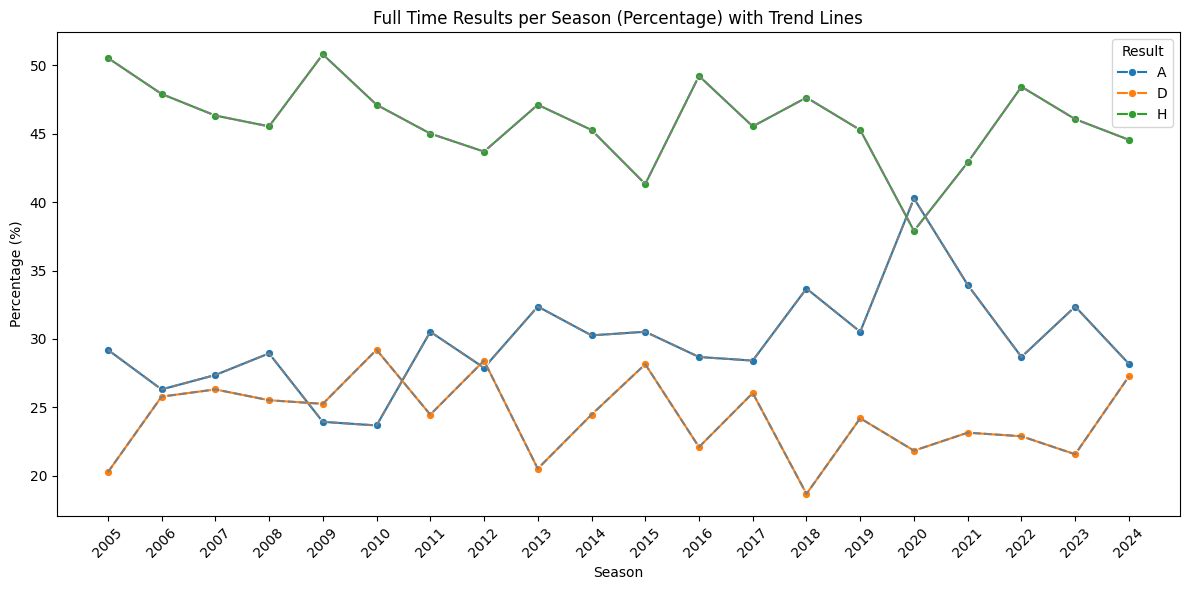

In [29]:
# Step 1: Aggregate the data to get counts of each FTR result per Season
result_counts = result.groupby(['Season', 'FTR']).size().unstack(fill_value=0)

# Step 2: Calculate percentages by dividing each count by the row total (season total)
result_percentages = result_counts.div(result_counts.sum(axis=1), axis=0) * 100

# Step 3: Plot using a line plot for each FTR type
plt.figure(figsize=(12, 6))

# For each FTR, plot the line and add the trend line
for ftr in result_percentages.columns:
    # Plot the actual line for the FTR percentage
    sns.lineplot(x=result_percentages.index, y=result_percentages[ftr], marker="o", label=ftr)
    
    # Add a trend line using LOWESS smoothing
    sns.lineplot(x=result_percentages.index, y=result_percentages[ftr], 
                 color="gray", linewidth=1.5, linestyle="--", 
                 estimator='lowess')  # LOWESS smoothing for trend

plt.title("Full Time Results per Season (Percentage) with Trend Lines")
plt.xlabel("Season")
plt.ylabel("Percentage (%)")
plt.legend(title="Result")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# save the data
result.to_csv(os.path.join("..","data","processed","all_concat_football_data.csv"), index=False)